In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

[ 80  80  79 ... 100  94  99]


<Figure size 1200x600 with 0 Axes>

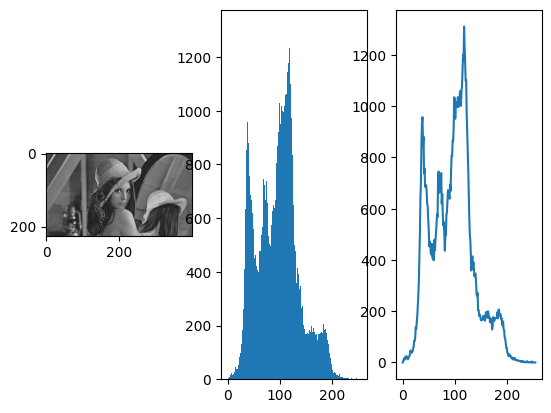

In [2]:
imbgr = cv2.imread('images/lena.jpg')
imGray = cv2.cvtColor(imbgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1, 3)

ax[0].imshow(imGray, cmap='grey', vmin=0, vmax=255)

bins = 256
flattened_imGray = imGray.ravel()
print(flattened_imGray)

ax[1].hist(flattened_imGray, bins, range=[0,255])
blue_hist = cv2.calcHist([imGray], [0], None, [256], [0, 256])
ax[2].plot(blue_hist)

plt.show()

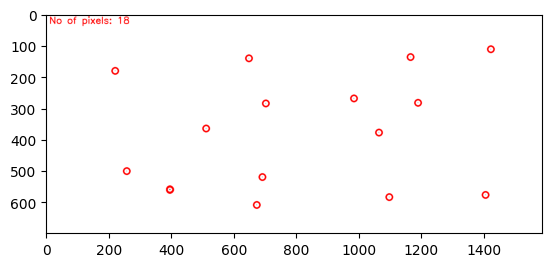

In [10]:
dotsBGR = cv2.imread("images/dots.bmp")
imGray = cv2.cvtColor(dotsBGR, cv2.COLOR_BGR2GRAY)

dotCount = 0

for x in range(imGray.shape[0]):
    for y in range(imGray.shape[1]):
        if imGray[x,y] == 0:
            cv2.circle(dotsBGR, center=(y,x), radius=10, color=(0,0,255), thickness=3)
            dotCount += 1

label = 'No of pixels: ' + str(dotCount)
cv2.putText(dotsBGR, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

dotsRGB = cv2.cvtColor(dotsBGR, cv2.COLOR_BGR2RGB)
plt.imshow(dotsRGB)
plt.show()

# while(1):
#     cv2.imshow('image',dotsBGR)
#     k = cv2.waitKey(1) & 0xFF
#     if k == 27:
#         break

# cv2.destroyAllWindows()

Red: 41, Green: 21, Blue: 21


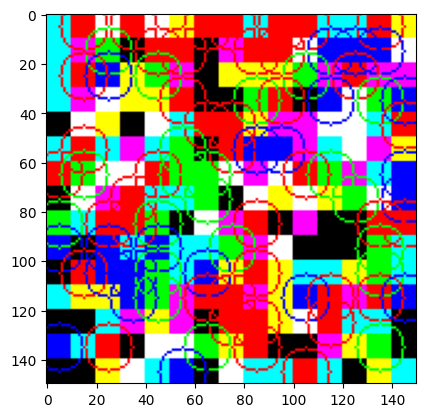

In [34]:

img = np.zeros((15,15,3), np.uint8)

for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        red = random.choice([True, False])
        green = random.choice([True, False])
        blue = random.choice([True, False])

        if red:
            img[x,y,0] = 255
        
        if green:
            img[x,y,1] = 255
        
        if blue:
            img[x,y,2] = 255

bigImg = cv2.resize(img, (img.shape[1]*10, img.shape[0]*10), interpolation=cv2.INTER_NEAREST)
rc = 0
gc = 0
bc = 0
for x in range(img.shape[0]):
    for y in range(img.shape[1]):

        if np.array_equal(img[x, y], [255, 0, 0]):
            rc += 1
            cv2.circle(bigImg, center=((y * 10) + 5, (x * 10) + 5), radius=10, 
                       color=(255, 0, 0), thickness=1)
        if np.array_equal(img[x, y], [0, 255, 0]):
            gc += 1
            cv2.circle(bigImg, center=((y * 10) + 5, (x * 10) + 5), radius=10, 
                       color=(0, 255, 0), thickness=1)
        if np.array_equal(img[x, y], [0, 0, 255]):
            bc += 1
            cv2.circle(bigImg, center=((y * 10) + 5, (x * 10) + 5), radius=10, 
                       color=(0, 0, 255), thickness=1)
        

print(f"Red: {rc}, Green: {gc}, Blue: {bc}")
plt.imshow(bigImg)